In [1]:
import os
import numpy as np
folder_path = './cpp_data_PMP'  # 替换为你的文件夹路径

# 使用 listdir 获取文件夹中所有文件的文件名
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
pallels = []
it_nums = []
times = []
datas = []
# 打印所有文件名
for file_name in file_names:
    # 获取时间数据
    if file_name.split(".")[1]=="txt":
        with open(folder_path+"/"+file_name, 'r') as file:
            times.append(float(file.readline()))
    # 获取并行度，迭代次数
    if file_name.split(".")[1]=="npy":
        pallels.append(int(file_name.split("_")[0]))
        it_nums.append(int(file_name.split("_")[1]))
        datas.append(np.load(folder_path+"/"+file_name))
        if datas[-1].shape[0] == pallels[-1]*it_nums[-1]:
            print("成功导入：",file_name)


成功导入： 1024_500000_sigma_true.npy
成功导入： 128_5000000_sigma_true.npy
成功导入： 16_25000000_sigma_true.npy
成功导入： 256_2000000_sigma_true.npy
成功导入： 32_20000000_sigma_true.npy
成功导入： 4_100000000_sigma_true.npy
成功导入： 512_1000000_sigma_true.npy
成功导入： 64_10000000_sigma_true.npy
成功导入： 8_50000000_sigma_true.npy


In [3]:
def skewness_fun(samples, num_chains,s_per_it):
    # A       权重数组
    # samples 样本数组
    # N       建议数
    # 检查数据格式
    
    samples_bar = samples.reshape(samples.shape[0],1)
    samples_bar = np.sum(samples_bar, axis=1)
    # 使用 NumPy 计算样本的标准差
    sample_std = np.std(samples_bar, ddof=1)  # ddof=1 表示计算样本方差
    mean = np.mean(samples_bar)
    print("\t样本标准差:",sample_std,"样本均值：",mean)

    skewness_list = []

    for i in range(5):
        num_chain = num_chains*10**i
        chains_len = int(samples_bar.shape[0]/num_chain)
        print("\t链长",chains_len)

        samples_bar_singer = samples_bar.reshape(num_chain,chains_len)
    
        samples_bar_singer = np.mean(samples_bar_singer, axis=1)

        samples_bar_singer = ((samples_bar_singer-mean)/ sample_std)**3
        skewness = np.mean(samples_bar_singer)
        skewness_list.append(skewness)
        print("\tskewness:",skewness)
    return skewness_list

skewness_list_d2 = []

for i in range(len(pallels)):
    print("并行度：",pallels[i])
    time = times[i]
    it_per_s = time/it_nums[i]/pallels[i]
    num_chains = int(it_nums[i]/10000) 
    skewness_list = skewness_fun(datas[i], num_chains,it_per_s)
    skewness_list_d2.append(skewness_list)
  

并行度： 1024
	样本标准差: 0.0426853271749384 样本均值： 0.5438397982706412
	链长 10240000
	skewness: 1.7366374850273467e-05
	链长 1024000
	skewness: 0.0005402368580403026
	链长 102400
	skewness: 0.021181905558831007
	链长 10240
	skewness: 0.2390428201686125
	链长 1024
	skewness: 0.33761532835328506
并行度： 128
	样本标准差: 0.04361056479399671 样本均值： 0.5442645118547882
	链长 1280000
	skewness: 5.909085368953253e-07
	链长 128000
	skewness: 0.0006827015178093924
	链长 12800
	skewness: 0.041822013157334685
	链长 1280
	skewness: 0.30223596089889326
	链长 128
	skewness: 0.36467717860610455
并行度： 16
	样本标准差: 0.046113238442717114 样本均值： 0.5458462093197156
	链长 160000
	skewness: 3.981889115552455e-05
	链长 16000
	skewness: 0.0024433605700726166
	链长 1600
	skewness: 0.1289777396193358
	链长 160
	skewness: 0.3834971088007183
	链长 16
	skewness: 0.40848870320310376
并行度： 256
	样本标准差: 0.043141882916495414 样本均值： 0.5439236928786256
	链长 2560000
	skewness: 1.97299614765396e-05
	链长 256000
	skewness: 0.00031769412405790613
	链长 25600
	skewness: 0.027663689553

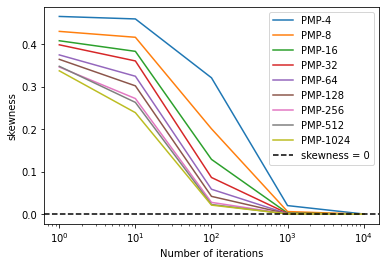

In [12]:
import matplotlib.pyplot as plt

x_ax = [10000,1000,100,10,1]
sorted_indices = np.argsort(pallels)

pallels = np.array(pallels)[sorted_indices]
skewness_list_d2 = np.array(skewness_list_d2)[sorted_indices]


for i in range(len(skewness_list_d2)):
    plt.plot(x_ax,skewness_list_d2[i],label="PMP-"+str(pallels[i]))
    plt.xscale('log') 
plt.axhline(y=0, color='black', linestyle='--', label='skewness = 0')
plt.ylabel("skewness")
plt.xlabel("Number of iterations")

plt.legend()
plt.savefig("skewness.pdf")
